Red Wine Quality Prediction Project

In [17]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install pandas_profiling
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Importing the csv file

In [18]:
redwine_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv?raw=true")

In [19]:
redwine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


By taking a look at the above data frame I can see that the column quality is the target label making the remaining columns as the features that we can customize and use to predict our label. This classifies to be a Classification problem!

Exploratory Data Analysis (EDA)

In [20]:
redwine_df.shape

(1599, 12)

So we can see that there are 1599 rows and 12 columns in the dataset.

In [21]:
redwine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
redwine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [23]:
redwine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [24]:
redwine_df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Now taking a look at all the feature columns we see that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates and alcohol, the acceptable range is +/-0.5 but the values above show that the there is the presence of outliers and they need to be treated. 

Visualization

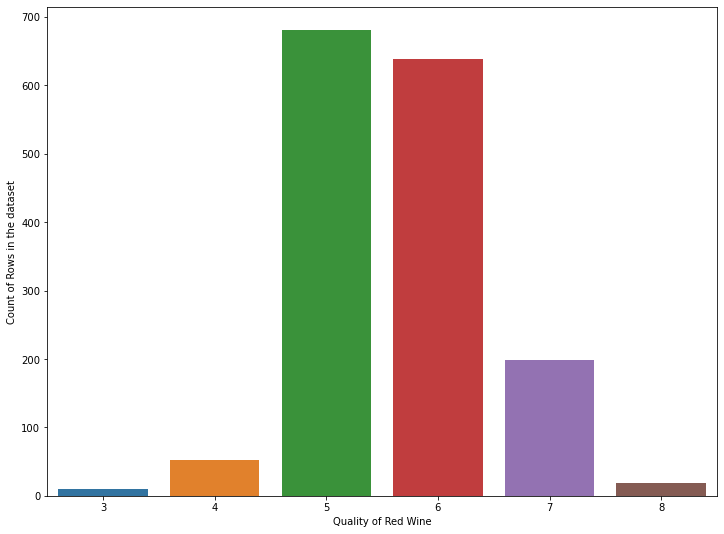

In [25]:
plt.figure(figsize=(12,9))
sns.countplot(x ='quality', data = redwine_df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

The plot representation shows varies categories of wine from the dataset. Quality of 5 and 6 wine are dominating the other variables which need to be sorted out before heading to machine learning so that there is no bias in the predection.

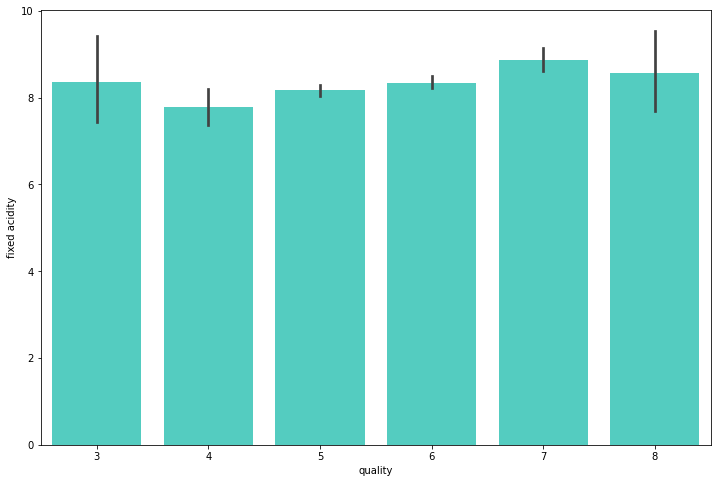

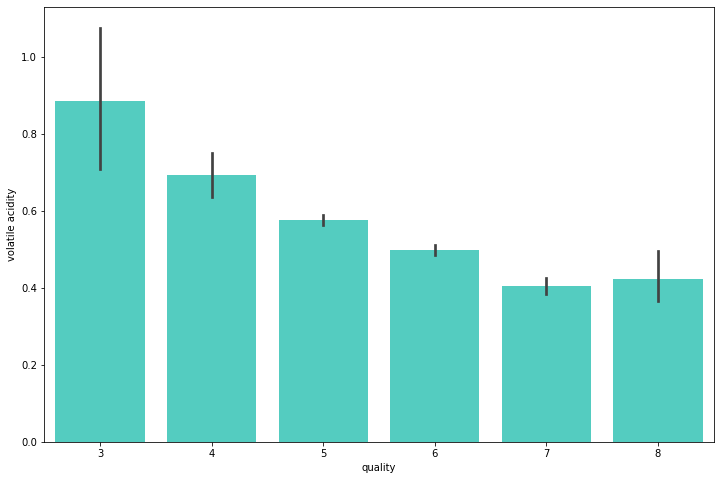

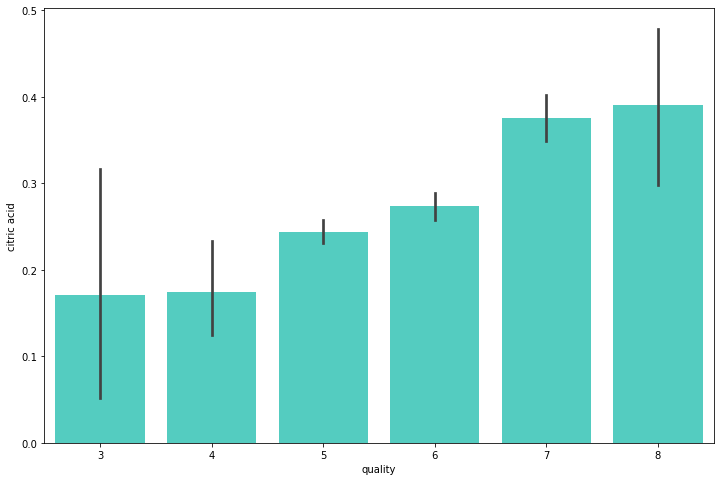

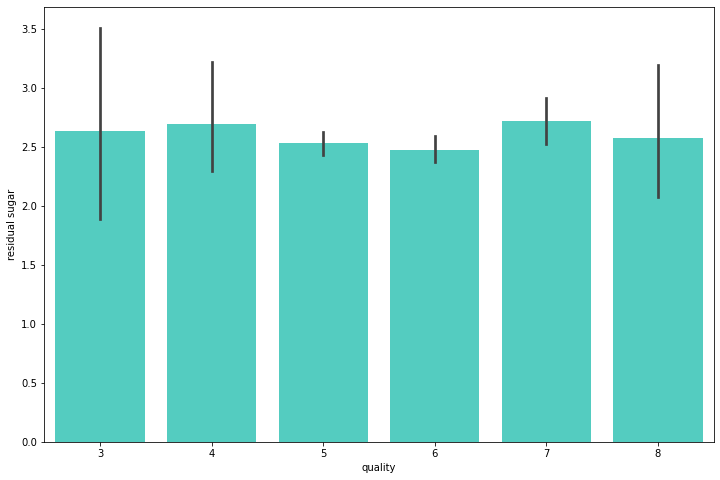

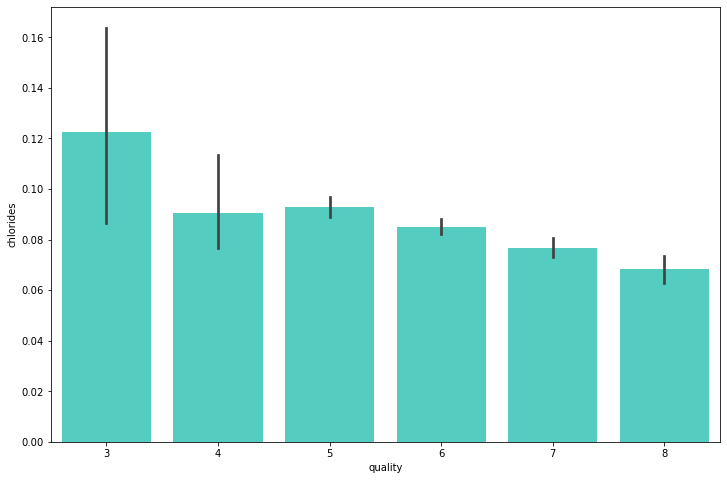

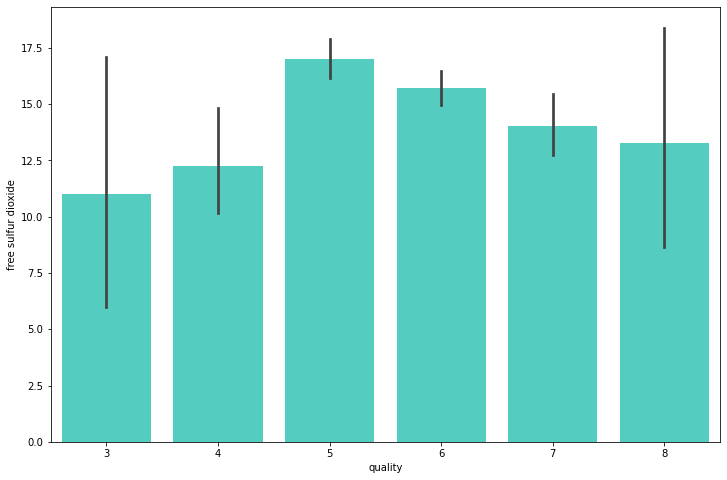

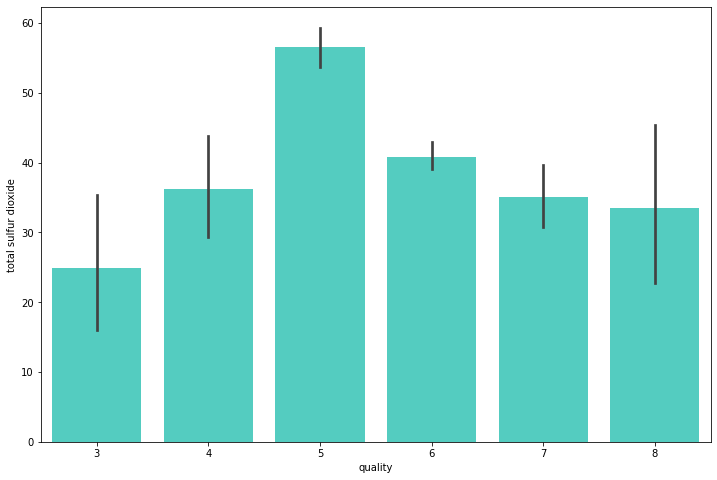

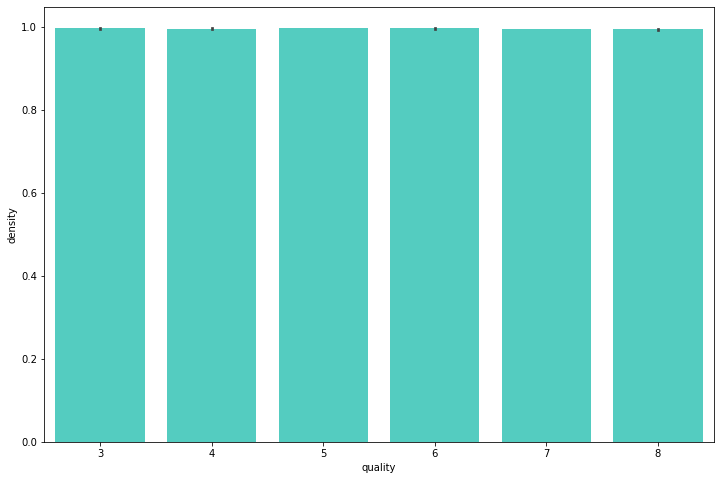

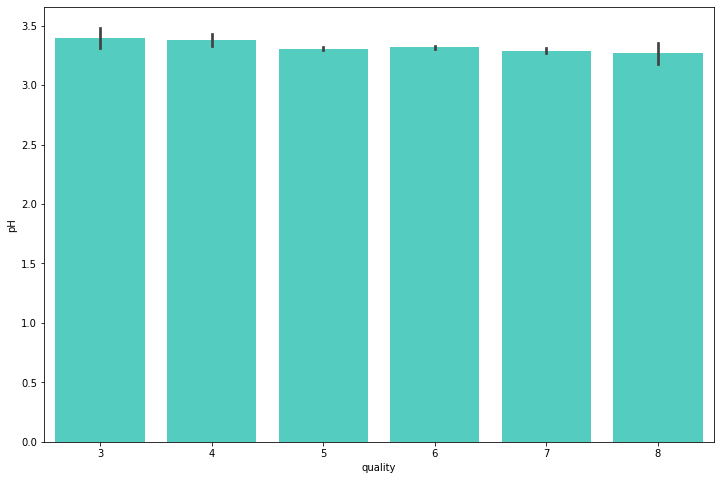

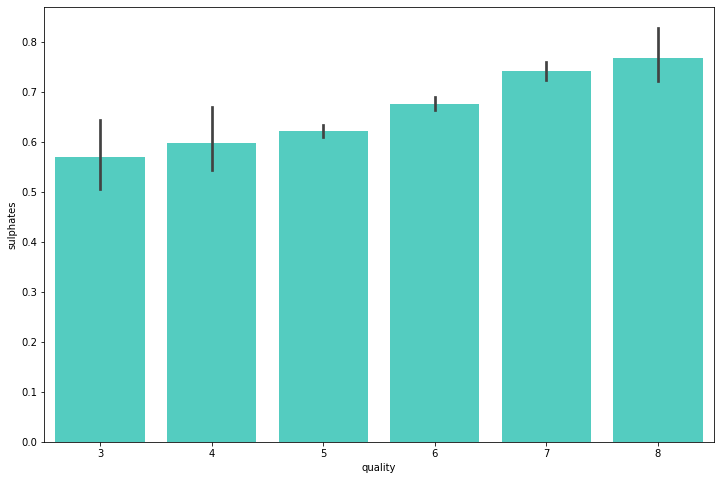

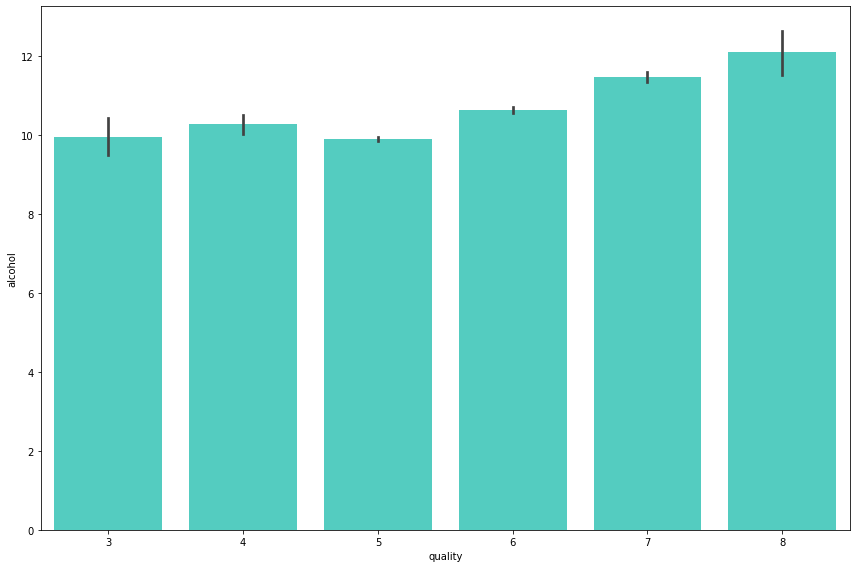

In [26]:
index=0
labels = redwine_df['quality']
features = redwine_df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(12,8))
    sns.barplot(x=labels, y=col[index], data=redwine_df, color="turquoise")
plt.tight_layout()
plt.show()

With the feature vs label barplot we are able to see the trend corresponding to the impact each has with respect to predicting the quality column (our target variable).

Observations regarding feature compared to the label are:

fixed acidity vs quality - no fixed pattern
volatile acidity vs quality - there is a decreasing trend
citric acid vs quality - there is an increasing trend
residual sugar vs quality - no fixed pattern
chlorides vs quality - there is a decreasing trend
free sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing
total sulfur dioxide vs quality - no fixed pattern as it is increasing then decreasing
density vs quality - no pattern at all
pH vs quality - no pattern at all
sulphates vs quality - there is an increasing trend
alcohol vs quality - there is an increasing trend
So here we can conclude that to get better quality wine citric acid, sulphates and alcohol columns play a major role.

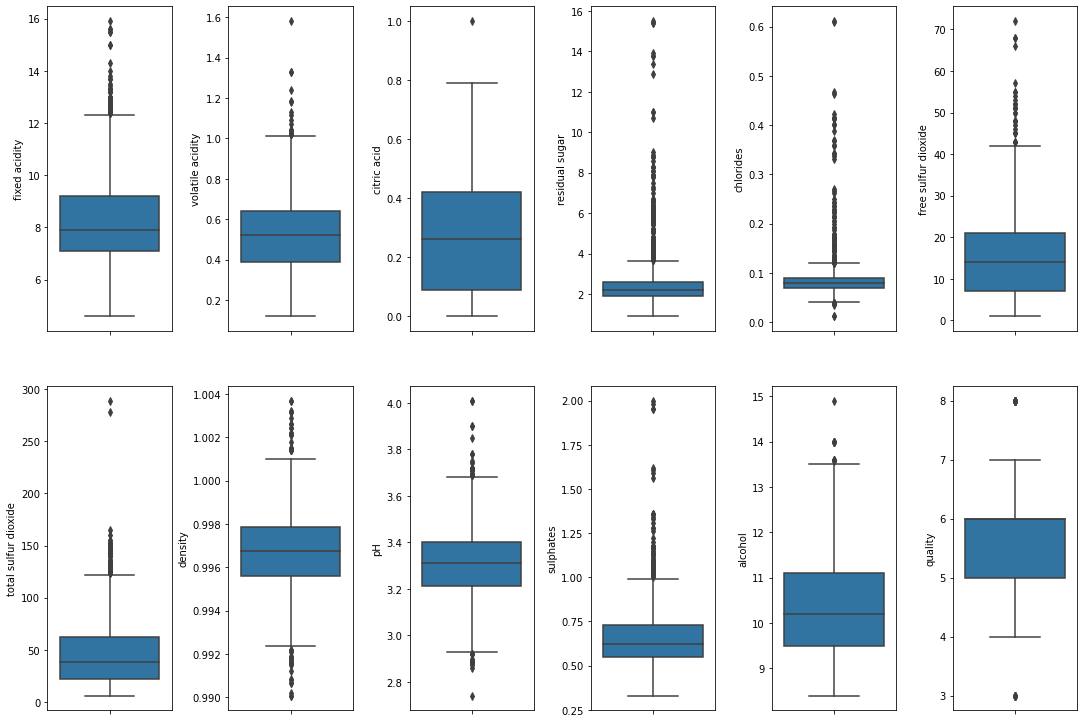

In [27]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in redwine_df.items():
    sns.boxplot(y=col, data=redwine_df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

The above boxplot we are able to see the whisker details and outliers clearly.I am ignoring the continous outlier sections but the outliers that are single values and far away from the whiskers of the boxplot may need to be treated depending upon further analysis. Right now I am just trying to retain as much of data which is possible in the given dataset.

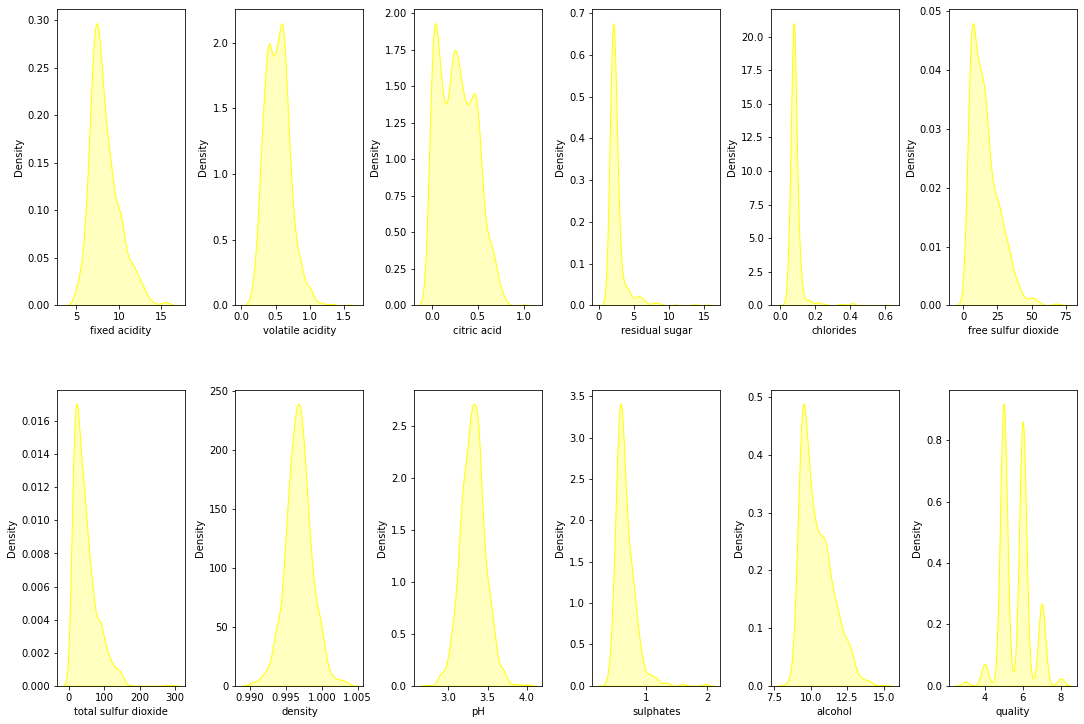

In [30]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in redwine_df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="yellow", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

The distribution plots show that few of the columns are in normal distribution category showing a proper bell shape curve. However, we do see skewness in most of the feature columns like citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol columns. We are going to ignore the label column since it is a categorical column and will need to fix the imbalance data inside it.

With respect to the treatment of skewness and outliers I will perform the removal or treatment after I can see the accuracy dependency of the machine learning models.

Correlation using a Heatmap
1.Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
2.Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

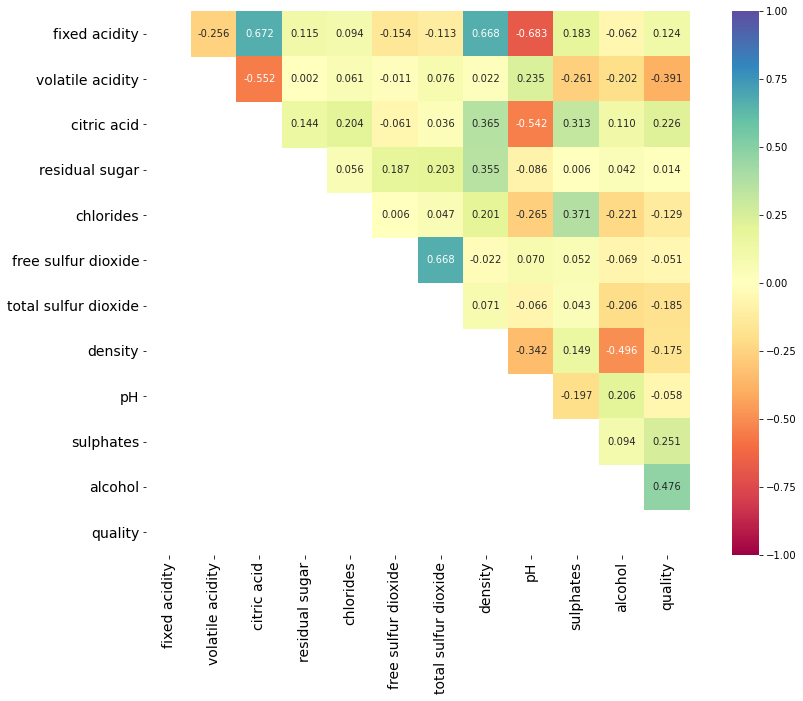

In [31]:
lower_triangle = np.tril(redwine_df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(redwine_df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

The above heatmap shows the correlation matrix data wherein there are positive as well as negative correlations between the target label and other feture columns. A zero correlation indicates that there is no relationship between the variables. Looking at the above representation I see that quality column is positively correlated with alcohol and it is negatively correlated with the volatile acidity. The quality column is least correlated with residual sugar showing a coefficient value of 0.014 that close to 0. Similarly we can bifurcate all the other positively and negatively correlated feature columns with respect to the target label.
Also there are some highly positive and negative correlated feature columns that can pose the concern for multicollinearity. If the correlation coefficient, assuming it to be the variable 'r', is exactly +1 or -1, then it is called perfect multicollinearity. But even if this 'r' is close to -1 or +1 then one of the features should be removed from the model if at all possible.
Right now I see columns fixed acidity and citirc acid are positively correlated with a value of 0.672 which is close to 1. Similary, columns fixed acidity and density are positively correlated with a value of 0.668 again being close to 1. The other 2 column that's positively correlated are free sulfur dioxide and total sulfur dioxide with a value of 0.668 which is close to the value 1. The only negatively correlated columns that pop up are fixed acitidy and pH with a value -0.683 being close to the value -1.

In [32]:
redwine_df= redwine_df.drop('free sulfur dioxide', axis=1)
redwine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [33]:
redwine_df.shape

(1599, 11)

Confirming the number of columns and rows before removing the outliers from the dataset.

In [34]:
# Z score method

z=np.abs(zscore(redwine_df))
threshold=3
np.where(z>3)

redwine_df=redwine_df[(z<3).all(axis=1)]
redwine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


Used the Z score method to get rid of outliers present in our dataset that are not in the acceptable range of +/-0.5 value of skewness

In [35]:
redwine_df.shape

(1464, 11)

Checking the no of rows after outlier removal technique.

In [36]:
# Percentage of Data Loss

data_loss=(1599-1464)/1599*100 

data_loss

8.442776735459661

Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [37]:
X = redwine_df.drop('quality', axis=1)
Y = redwine_df['quality']

Bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

Taking care of class imbalance

In [38]:
Y.value_counts()

5    624
6    590
7    187
4     47
8     16
Name: quality, dtype: int64

Listing the values of our label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

In [39]:
# adding samples to make all the categorical quality values same
!pip install imblearn 
from imblearn.over_sampling import SMOTE

In [40]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [41]:
Y.value_counts()

4    624
6    624
8    624
5    624
7    624
Name: quality, dtype: int64

After applying over sampling we are one again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [42]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
3115    8
3116    8
3117    8
3118    8
3119    8
Name: quality, Length: 3120, dtype: int64

Label Binarization

In [43]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) 
Y

0       0
1       0
2       0
3       0
4       0
       ..
3115    1
3116    1
3117    1
3118    1
3119    1
Name: quality, Length: 3120, dtype: int64

In [44]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...
3115,10.595083,0.353279,0.528033,2.547542,0.070066,16.000000,0.997031,3.153934,0.652623,11.098359
3116,8.471052,0.411710,0.384474,1.790789,0.067355,12.092106,0.995237,3.338947,0.727763,11.543421
3117,8.329691,0.489869,0.397292,2.249347,0.074210,16.641924,0.993163,3.203581,0.709258,12.885154
3118,9.240832,0.302170,0.543360,2.720416,0.078625,16.710603,0.996371,3.155788,0.933023,11.577006


Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.655312,1.035127,-1.505373,-0.639829,-0.142208,-0.115149,0.841565,1.465413,-0.802129,-1.262893
1,-0.402713,2.051725,-1.505373,0.141274,1.076224,1.130169,0.231711,-0.788481,0.106451,-0.902875
2,-0.402713,1.373993,-1.299040,-0.193484,0.743924,0.639589,0.353682,-0.352243,-0.120694,-0.902875
3,1.744382,-1.336937,1.383280,-0.639829,-0.197591,0.866011,0.963535,-1.079306,-0.650699,-0.902875
4,-0.655312,1.035127,-1.505373,-0.639829,-0.142208,-0.115149,0.841565,1.465413,-0.802129,-1.262893
...,...,...,...,...,...,...,...,...,...,...
3115,1.362378,-0.923076,1.218383,0.082738,-0.470876,-0.794413,0.372479,-1.123406,-0.100835,0.265707
3116,0.021056,-0.593067,0.477861,-0.761693,-0.620982,-0.941885,-0.721265,0.221753,0.468090,0.666282
3117,-0.068213,-0.151643,0.543983,-0.250006,-0.241365,-0.770189,-1.986427,-0.762446,0.327976,1.873904
3118,0.507171,-1.211723,1.297444,0.275642,0.003193,-0.767597,-0.029879,-1.109930,2.022213,0.696511


All the feature columns are float type and display decimal data. So standard scaler method is used to standardize all feature columns.

Creating training and testing datasets

20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

Machine Learning Model for Classification and Evaluation Metrics

In [47]:
# Classification Model Function

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [48]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 90.38461538461539

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       391
           1       0.86      0.89      0.87       233

    accuracy                           0.90       624
   macro avg       0.90      0.90      0.90       624
weighted avg       0.91      0.90      0.90       624

Cross Validation Score: 87.1474358974359

Accuracy Score - Cross Validation Score is 3.237179487179489


In [49]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 93.26923076923077

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       391
           1       0.89      0.93      0.91       233

    accuracy                           0.93       624
   macro avg       0.93      0.93      0.93       624
weighted avg       0.93      0.93      0.93       624

Cross Validation Score: 89.77564102564102

Accuracy Score - Cross Validation Score is 3.4935897435897516


In [50]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 92.62820512820514

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       391
           1       0.88      0.93      0.90       233

    accuracy                           0.93       624
   macro avg       0.92      0.93      0.92       624
weighted avg       0.93      0.93      0.93       624

Cross Validation Score: 89.07051282051283

Accuracy Score - Cross Validation Score is 3.5576923076923066


In [51]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 95.51282051282051

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       391
           1       0.93      0.95      0.94       233

    accuracy                           0.96       624
   macro avg       0.95      0.95      0.95       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 92.08333333333331

Accuracy Score - Cross Validation Score is 3.4294871794871966


In [52]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 91.66666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       391
           1       0.85      0.94      0.89       233

    accuracy                           0.92       624
   macro avg       0.91      0.92      0.91       624
weighted avg       0.92      0.92      0.92       624

Cross Validation Score: 88.26923076923077

Accuracy Score - Cross Validation Score is 3.3974358974358836


In [53]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 96.15384615384616

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       391
           1       0.94      0.96      0.95       233

    accuracy                           0.96       624
   macro avg       0.96      0.96      0.96       624
weighted avg       0.96      0.96      0.96       624

Cross Validation Score: 93.26923076923077

Accuracy Score - Cross Validation Score is 2.884615384615387


Hyper parameter tuning on the best ML Model

In [54]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

After comparing all the classification models I have selected Support Vector Classifier as my best model and have listed down it's parameters above referring the sklearn webpage.

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

Using the Grid Search CV method for hyper parameter tuning my best model.

In [57]:
GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

Trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [58]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [59]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 93.26923076923077


Successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

AUC ROC Curve

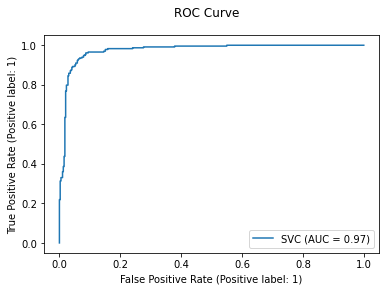

In [60]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

Generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 97%

Confusion Matrix

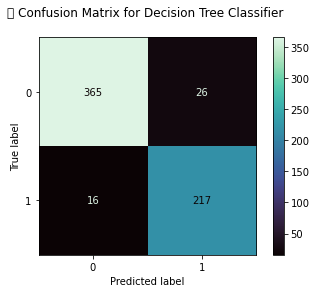

In [63]:
class_names = redwine_df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

The above confusion matrix is giving the number of times we got the correct outputs and the number of times model missed to provide the correct prediction.

Saving the model

In [64]:
filename = "FinalModel_3.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_3.pkl']